In [1]:
import numpy as np
import numpy.linalg as linalg

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image # pip install pillow

In [2]:
img = Image.open('attface.jpg').convert(mode='L')
img = np.array(img) # np.asarray(img)
m, n = img.shape

nh, nw = 4, 10  # 40 faces
height = m//nh
width = n//nw
height, width # (width, height):each face size

(57, 47)

In [3]:
face = np.empty_like(img).reshape(nh,nw, -1)
for i in range(nh):
    for j in range(nw):
        y = i*height
        x = j*width       
        face[i,j,:] = img[y:y+height, x:x+width].flatten()
face = face.reshape(nh*nw, -1) # nh*nw = 40
face.shape

(40, 2679)

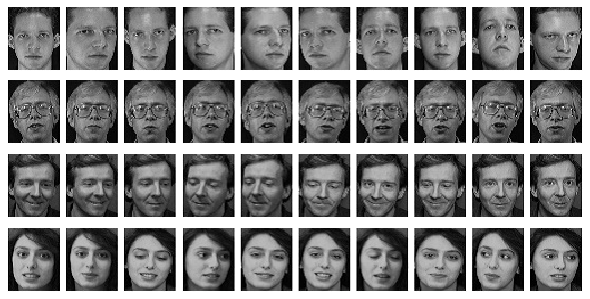

In [4]:
fig, ax = plt.subplots(nh, nw, figsize=(8,4))
for k in range(nh*nw): # nh*nw = 40
    i = k// 10
    j = k % 10
    ax[i, j].axis('off')
    ax[i, j].imshow(face[k].reshape(height, width), cmap='gray')
fig.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, 
                   hspace = 0.1, wspace = 0.1)
plt.show()

In [5]:
#1: AtA
mFace = np.mean(face, axis = 0) 
A = face - mFace 
AtA = np.dot(A.T, A) #  2679 x 2679

ata_w, V = linalg.eigh(AtA)
# decending order by reverse
ata_w = ata_w[::-1] 
V = V[:, ::-1]
ata_w.shape, V.shape

((2679,), (2679, 2679))

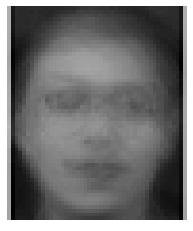

In [6]:
plt.imshow(mFace.reshape(height, width), cmap='gray')
plt.axis('off')
plt.show()

In [7]:
r = np.linalg.matrix_rank(A) # np.linalg.matrix_rank(AtA)
r

39

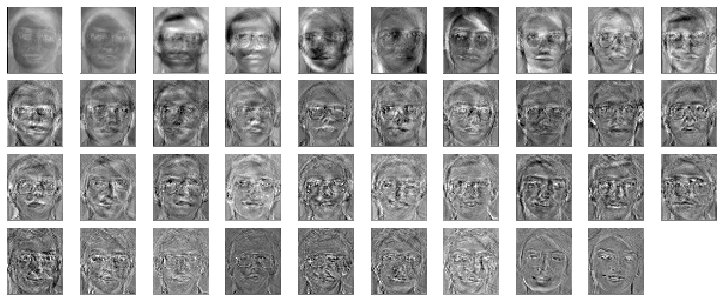

In [8]:
fig, ax = plt.subplots(nh, nw, figsize=(10,4))
eigenFace = np.zeros_like(face).astype(np.float)
for k in range(r):# r = 39
    eigenFace[k,:] = V[:,k]
    ax[k//10, k%10].imshow(eigenFace[k].reshape(height, width), cmap='gray')
    ax[k//10, k%10].axis('off')
ax[3, 9].axis('off')
fig.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, 
                    hspace = 0.1, wspace = 0.1)

In [9]:
#2: AAt

mFace = np.mean(face, axis = 0) 
A = face - mFace
AAt = np.dot(A, A.T) # 40 x 40

aat_w, U = linalg.eigh(AAt)
# decending order by reverse
aat_w = aat_w[::-1] 
U = U[:, ::-1]
aat_w.shape, U.shape

((40,), (40, 40))

In [10]:
np.allclose(ata_w[:r], aat_w[:r])

True

In [11]:
V2 = np.dot(A.T, U) 
V2 = V2 / np.linalg.norm(V2, axis=0).reshape(1, -1) # unit vector
V2.shape

(2679, 40)

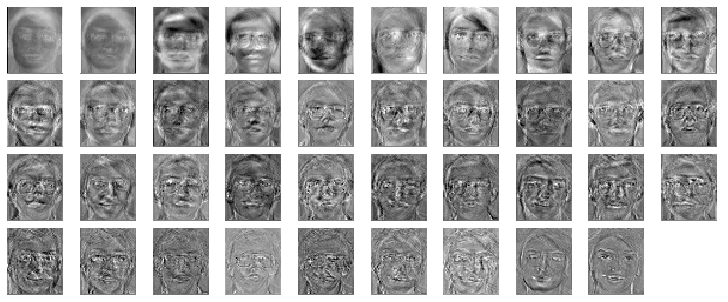

In [12]:
fig, ax = plt.subplots(nh, nw, figsize=(10,4))
eigenFace2 = np.zeros_like(face).astype(np.float)
for k in range(r): # r = 39
    eigenFace2[k,:] = V2[:,k]
    ax[k//10, k%10].imshow(eigenFace2[k].reshape(height, width), cmap='gray')
    ax[k//10, k%10].axis('off')
ax[3, 9].axis('off')
fig.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, 
                   hspace = 0.1, wspace = 0.1)

In [13]:
# Eigenvector sign check
for k  in range(r): # r = 39
    if V[0,k]*V2[0, k]< 0:     # the first element sign in V, V2
        V2[:,k] = -V2[:,k]

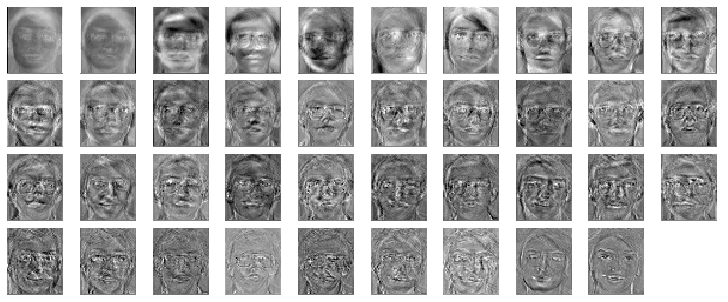

In [14]:
fig, ax = plt.subplots(nh, nw, figsize=(10,4))
eigenFace3 = np.zeros_like(face).astype(np.float)
for k in range(r):# r = 39
    eigenFace3[k,:] = V2[:,k]
    ax[k//10, k%10].imshow(eigenFace2[k].reshape(height, width), cmap='gray')
    ax[k//10, k%10].axis('off')
ax[3, 9].axis('off')
fig.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, 
                   hspace = 0.1, wspace = 0.1)

In [15]:
np.allclose(eigenFace, eigenFace3) # np.allclose(V[:,:r], V2[:,:r])

True